## Developers Job Satisfation 

### Introduction    

Attracting and retaining talented developers is one of the main challenges for technology companies. The demand is growing rapidly, but the number of formed professionals is still limited. To understand what is important for developers when accepting a job offer and also what satisfies them professionally, let's take a look at the annual StackOverflow survey, conducted in 2020 with around 65 thousand developers around the world.    

### Content
* Accessing Data
* Data Preparation
* Exploratory Data Analysis    
  * Employment and Satisfaction    
  * Current Job Factors    
  * Job Satisfaction X Job Seek    
  * Job Hunting    


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import textwrap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# set options
pd.set_option('display.max_columns', 61)
pd.set_option('display.max_rows', 61)

### Accessing data

In [3]:
# read data
data = pd.read_csv('data/survey_results_public.csv', index_col='Respondent', na_values = ['no info', '.', 'NA', 'Missing'])
questions = pd.read_csv('data/survey_results_schema.csv', index_col='Column') 

In [4]:
# survey questions
questions.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...


In [5]:
# survey responses
data.head(3)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [6]:
data.shape 

(64461, 60)

### Data Preparation

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    64162 non-null  object 
 1   Hobbyist                      64416 non-null  object 
 2   Age                           45446 non-null  float64
 3   Age1stCode                    57900 non-null  object 
 4   CompFreq                      40069 non-null  object 
 5   CompTotal                     34826 non-null  float64
 6   ConvertedComp                 34756 non-null  float64
 7   Country                       64072 non-null  object 
 8   CurrencyDesc                  45472 non-null  object 
 9   CurrencySymbol                45472 non-null  object 
 10  DatabaseDesireNextYear        44070 non-null  object 
 11  DatabaseWorkedWith            49537 non-null  object 
 12  DevType                       49370 non-null  object 
 13  E

In [8]:
# select features
data = data[['MainBranch', 'Age', 'ConvertedComp', 'DevType', 'Employment',
             'JobFactors', 'JobSat', 'JobSeek', 'NEWJobHunt', 'NEWJobHuntResearch',
             'NEWOnboardGood', 'NEWOvertime', 'PurchaseWhat','WorkWeekHrs']] 

In [9]:
# rename column
data.rename(columns={'ConvertedComp': 'AnnualSalaryUSD'}, inplace=True)

In [10]:
# filter by professional developers 
data = data[data['MainBranch'] == 'I am a developer by profession']

In [11]:
# statistics
data.describe()

,Age,AnnualSalaryUSD,WorkWeekHrs
count,34348.000000,3.158100e+04,37203.000000
mean,31.699662,1.026831e+05,40.672495
std,8.723062,2.237351e+05,17.919047
min,1.000000,0.000000e+00,1.000000
25%,26.000000,2.446800e+04,40.000000
50%,30.000000,5.403000e+04,40.000000
75%,36.000000,9.500000e+04,43.000000
max,279.000000,2.000000e+06,475.000000


In [12]:
# age filter (remove outliers)  
data = data.query("Age >= 14 & Age <= 99") 

In [13]:
# limit max hours/week (remove outliers)  
data = data[(data['WorkWeekHrs'] < 168)]

In [14]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False).round(2)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
AnnualSalaryUSD,4485,14.10
PurchaseWhat,3270,10.28
NEWJobHuntResearch,2041,6.42
NEWJobHunt,1313,4.13
JobFactors,707,2.22
NEWOnboardGood,424,1.33
DevType,178,0.56
NEWOvertime,139,0.44
JobSat,47,0.15
Employment,41,0.13


Since the most important information regarding job satisfaction is expressed by 'JobSat', we'll drop the missing values. The same logic applies to 'Employment'. The remaining missing values will be dealt with later, as needed.

In [15]:
# drop nan values
data.dropna(subset=['Employment', 'JobSat'], inplace=True)

In [16]:
data.shape

(31722, 14)

---

## Exploratory Data Analysis

### **Employment & Satisfaction**

* Developers current employment status    
* How satisfied are the developers with their current jobs?
* Are employed developers looking for a new job?    


In [17]:
def normalize_plot(feature):
    ''' Normalize data and plot with the respective question'''

    feat = data[feature].value_counts(normalize=True)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=feat.values, y=feat.index, palette="viridis")
    plt.title(textwrap.fill(questions.loc[feature, 'QuestionText'], width=80))
    return plt.show()

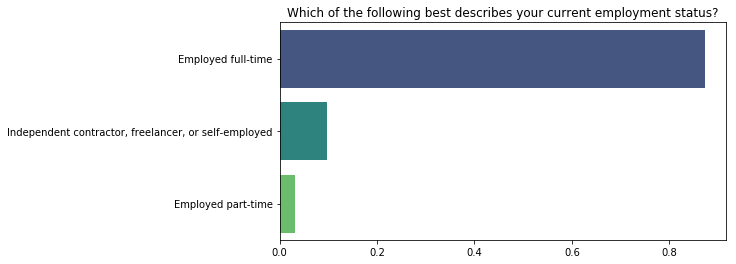

In [18]:
normalize_plot('Employment')

In [19]:
data['Employment'].value_counts(normalize=True)

Employed full-time                                      0.873116
Independent contractor, freelancer, or self-employed    0.096242
Employed part-time                                      0.030641
Name: Employment, dtype: float64

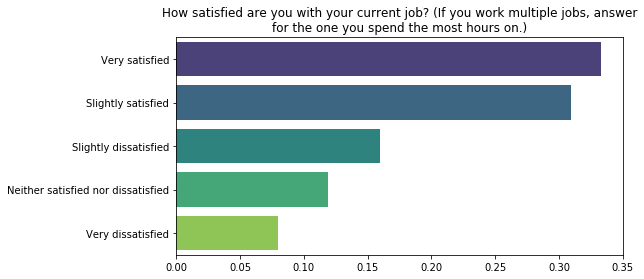

In [20]:
normalize_plot('JobSat')

In [21]:
data['JobSat'].value_counts(normalize=True)

Very satisfied                        0.333239
Slightly satisfied                    0.309155
Slightly dissatisfied                 0.159290
Neither satisfied nor dissatisfied    0.118940
Very dissatisfied                     0.079377
Name: JobSat, dtype: float64

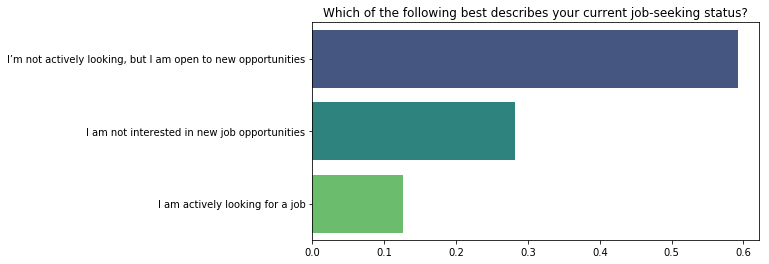

In [22]:
normalize_plot('JobSeek')

In [23]:
data['JobSeek'].value_counts(normalize=True)

I’m not actively looking, but I am open to new opportunities    0.591829
I am not interested in new job opportunities                    0.282233
I am actively looking for a job                                 0.125938
Name: JobSeek, dtype: float64

---

#### **Employment & Satisfaction** - Key Findings

For this analysis, only employed developers were selected.    
* 87% of them work full time 
* 3% of them work part-time    
* The others work independently or as freelancers.    

#### How satisfied are the developers with their current jobs?

* 64% of developers are very satisfied or slightly satisfied with their current job.
* The very dissatisfied or slightly dissatisfied add up to 24%. 
* 12% are neither satisfied nor dissatisfied.    

#### Are employed developers looking for a new job?    

* 12% of the developers are looking for a new job. 
* Almost 60% is not actively looking, but are open to new opportunities.
* The rest is not interested in a new job.    




---

### **Current Job Factors**

* Is it possible to identify factors in the current job that contribute to job satisfaction?
* What is the impact of salary on developers' satisfaction?

In [24]:
def split_plot(feature):
    ''' Split options (select all that apply) and plot'''

    feat = data[feature].str.get_dummies(';').sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(feat.values, feat.index, palette="viridis")
    plt.title(textwrap.fill(questions.loc[feature, 'QuestionText'], width=80))
    return plt.show()

In [25]:
# create satisfaction score column
data['JobSat_Score'] = data['JobSat'].replace({'Very dissatisfied': 1, 'Slightly dissatisfied': 2,
                                               'Neither satisfied nor dissatisfied': 3,
                                               'Slightly satisfied': 4, 'Very satisfied': 5})

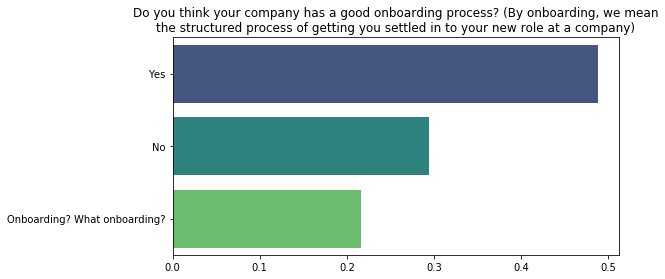

In [26]:
normalize_plot('NEWOnboardGood')

In [51]:
# Mean satisfaction score
data.groupby('NEWOnboardGood')['JobSat_Score'].mean().sort_values(ascending=False)

NEWOnboardGood
Yes                             3.940292
Onboarding? What onboarding?    3.469652
No                              3.326294
Name: JobSat_Score, dtype: float64

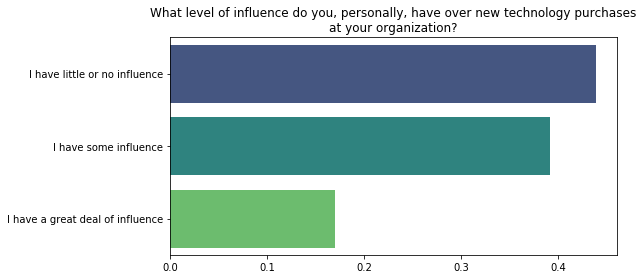

In [28]:
normalize_plot('PurchaseWhat')

In [29]:
# Mean satisfaction score
data.groupby('PurchaseWhat')['JobSat_Score'].mean().sort_values(ascending=False)

PurchaseWhat
I have a great deal of influence    3.821111
I have some influence               3.733285
I have little or no influence       3.514537
Name: JobSat_Score, dtype: float64

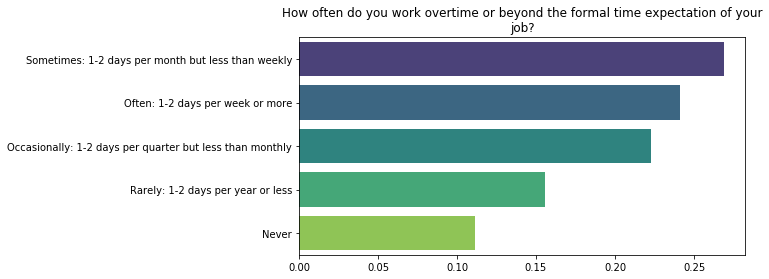

In [30]:
normalize_plot('NEWOvertime')

In [31]:
# Mean satisfaction score
data.groupby('NEWOvertime')['JobSat_Score'].mean().sort_values(ascending=False)

NEWOvertime
Sometimes: 1-2 days per month but less than weekly          3.715698
Occasionally: 1-2 days per quarter but less than monthly    3.703735
Rarely: 1-2 days per year or less                           3.650254
Often: 1-2 days per week or more                            3.605363
Never                                                       3.555587
Name: JobSat_Score, dtype: float64

---

Some factors seem to contribute to the developers' satisfaction.    
The average satisfaction is **slightly higher** when:    
* the company has a good onboarding (a structured process to settle the professional in the new role);
* the developer have some influence on the technological tools acquired by the company;
* the developer receive a good salary.

---

* **Salary**

In [32]:
# create a subset
salary = data[['AnnualSalaryUSD', 'JobSat_Score']]
salary.head()

,AnnualSalaryUSD,JobSat_Score
Respondent,,
8,116000.0,2
9,NaN,1
10,32315.0,5
11,40070.0,2
12,14268.0,1


In [33]:
# drop nan and 0 values
salary.replace(0, np.nan, inplace=True)
salary.dropna(inplace=True)
salary.shape[0]

27207

In [34]:
# filter outliers
print('Salaries lower than: USD', data['AnnualSalaryUSD'].quantile(0.05)) # 5% lower wages
print('Salaries than: USD', data['AnnualSalaryUSD'].quantile(0.95)) # 5% higher wages

Salaries lower than: USD 5817.0
Salaries than: USD 250000.0


In [35]:
# remove outliers
salary = salary.query("AnnualSalaryUSD >= 5773 & AnnualSalaryUSD <= 250000") 

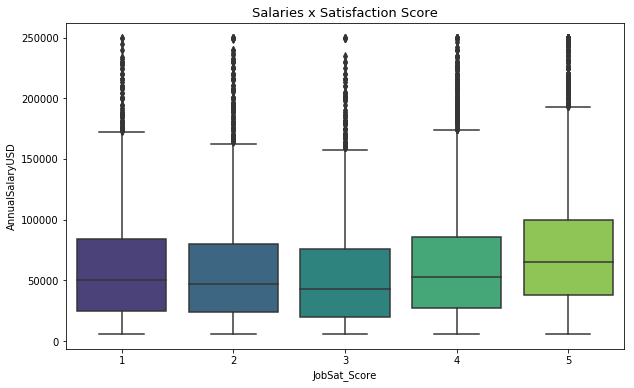

In [36]:
# plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x="JobSat_Score", y="AnnualSalaryUSD",
            data=salary, palette="viridis");
plt.title('Salaries x Satisfaction Score', fontsize=13)
plt.show()

* The most satisfied developers have, on average, higher wages    
But the opposite is not necessarily true:
* The developers with the lowest average wages answered are neither satisfied nor dissatisfied.

---

### **Job Satisfaction X Job Seek**
* How does satisfaction in the current job impact the search for new opportunities?

In [37]:
# JobSat x JobSeek
data.groupby('JobSat')['JobSeek'].value_counts(normalize=True)

JobSat                              JobSeek                                                     
Neither satisfied nor dissatisfied  I’m not actively looking, but I am open to new opportunities    0.710840
                                    I am actively looking for a job                                 0.191360
                                    I am not interested in new job opportunities                    0.097800
Slightly dissatisfied               I’m not actively looking, but I am open to new opportunities    0.673263
                                    I am actively looking for a job                                 0.253315
                                    I am not interested in new job opportunities                    0.073422
Slightly satisfied                  I’m not actively looking, but I am open to new opportunities    0.707148
                                    I am not interested in new job opportunities                    0.207505
                               

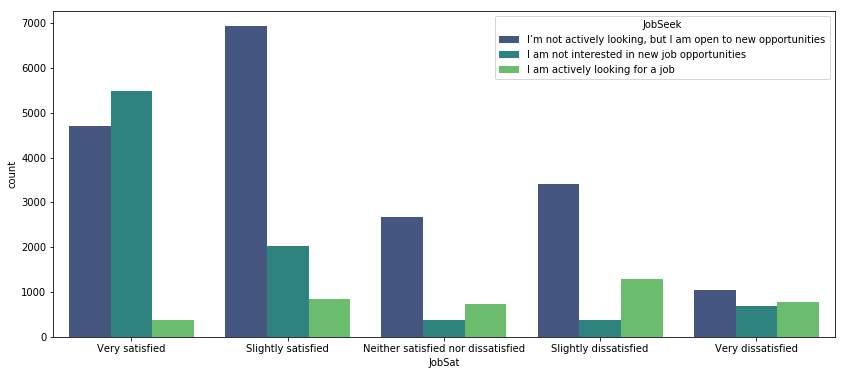

In [38]:
# order values 
order = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied',
         'Slightly dissatisfied', 'Very dissatisfied']
hue_order = ["I’m not actively looking, but I am open to new opportunities",
             'I am not interested in new job opportunities', 'I am actively looking for a job']

# plot 
plt.figure(figsize=(14, 6))
sns.countplot(x="JobSat", hue="JobSeek", data=data, order=order, hue_order=hue_order, palette="viridis")
plt.show()

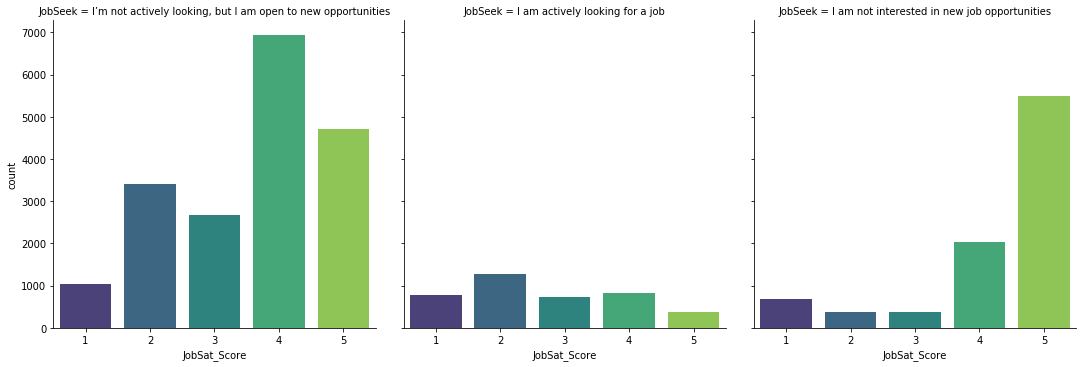

In [39]:
# JobSeek x Satisfaction scores
g = sns.catplot(x="JobSat_Score", col="JobSeek", data=data,
                kind="count", palette="viridis")

In [40]:
## Job seek x Mean satisfaction score
data.groupby('JobSeek')['JobSat_Score'].mean()

JobSeek
I am actively looking for a job                                 2.679850
I am not interested in new job opportunities                    4.259466
I’m not actively looking, but I am open to new opportunities    3.578619
Name: JobSat_Score, dtype: float64

---

Even the developers who are satisfied with their current jobs can leave the company for a better opportunity:    

**Very satisfied professionals:**   
* 52% of them are not interested in a new job opportunity.       
* 44% are open to new opportunities       


**Slightly satisfied developers:**    
* 71% are available for new opportunities    
* 8% are actively looking for a new job    
  



---

* **Most important factors in a job offer**

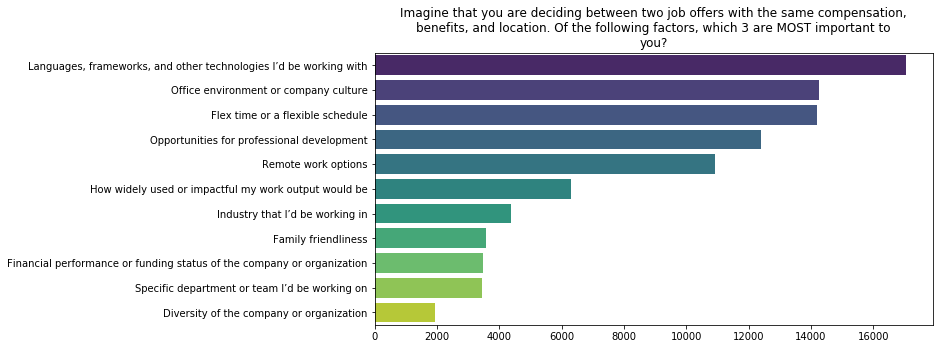

In [41]:
split_plot('JobFactors')

In a situation where it is necessary to decide between two job offers with equal local conditions, salary, and benefits, the **3 MOST important factors** are:    

* The technologies that will be used
* The work environment or company culture
* Flextime or a flexible schedule


---

### Job Hunting


* What drives employed developers to look for a new job?

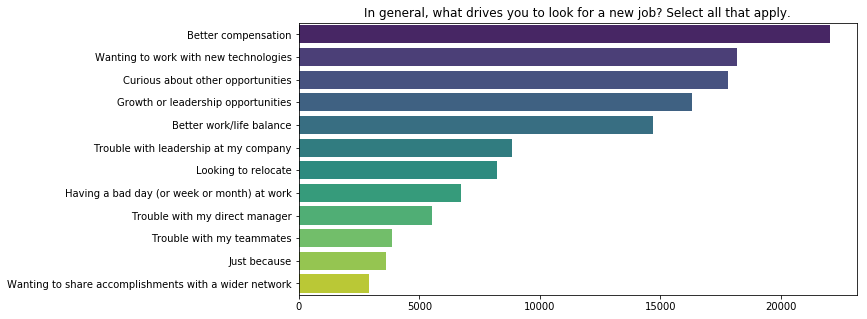

In [42]:
split_plot('NEWJobHunt')

* **Satisfaction x Job seek reasons**

In [43]:
def clean_df(df, feature):
    ''' Splits the answer options and creates a new df
    with the percentage of options
    '''

    feature_df = df[feature].str.get_dummies(';').sum().reset_index()
    feature_df.rename(columns={'index': 'Factors', 0: 'Count'}, inplace=True)
    feature_df.set_index('Factors', inplace=True)
    props_feature_df = feature_df/feature_df.sum()

    return props_feature_df

In [44]:
# satisfaction subsets 
satisfied = data[data['JobSat_Score'] > 3] # 'Very satisfied' or 'Slightly satisfied'
dissatisfied = data[data['JobSat_Score'] < 3] # 'Very dissatisfied' or 'Slightly dissatisfied'

In [45]:
# clean df
satisfied_perc = clean_df(satisfied, 'NEWJobHunt')
dissatisfied_perc = clean_df(dissatisfied, 'NEWJobHunt')

In [46]:
# compares factors considering satisfaction 
comp_df = pd.merge(satisfied_perc, dissatisfied_perc, left_index=True, right_index=True)
comp_df.columns = ['satisfied_perc', 'dissatisfied_perc']
comp_df['Diff_Satisfaction_Vals'] = comp_df['satisfied_perc'] - comp_df['dissatisfied_perc']
comp_df.style.bar(subset=['Diff_Satisfaction_Vals'], align='mid', color=['#e55d5d', '#5fbe65'])

,satisfied_perc,dissatisfied_perc,Diff_Satisfaction_Vals
Factors,,,
Better compensation,0.173250,0.165875,0.007375
Better work/life balance,0.113141,0.111046,0.002095
Curious about other opportunities,0.144259,0.126473,0.017786
Growth or leadership opportunities,0.128601,0.123018,0.005583
Having a bad day (or week or month) at work,0.044936,0.067788,-0.022852
Just because,0.030695,0.021660,0.009035
Looking to relocate,0.066352,0.057760,0.008592
Trouble with leadership at my company,0.064139,0.083092,-0.018953
Trouble with my direct manager,0.042995,0.046220,-0.003225


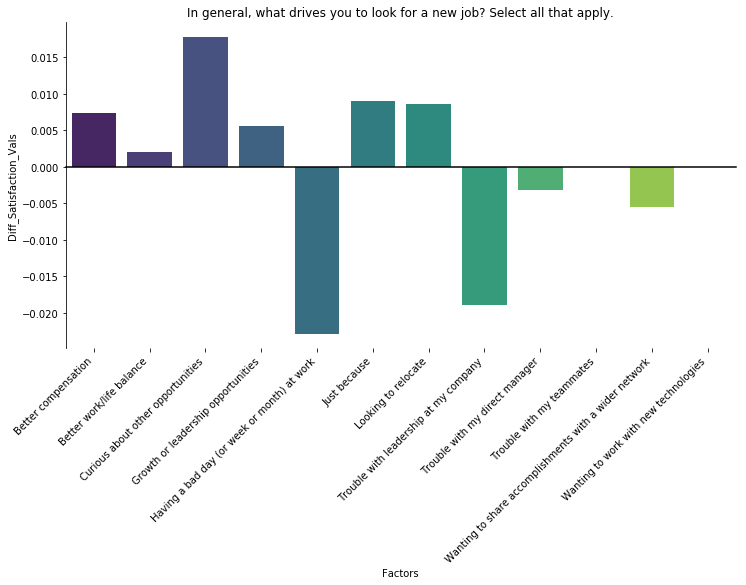

In [47]:
comp_df2 = comp_df.reset_index()

# plot 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=comp_df2['Factors'], y=comp_df2['Diff_Satisfaction_Vals'], palette="viridis")
plt.title(textwrap.fill(questions.loc['NEWJobHunt', 'QuestionText'], width=100))
plt.xticks(rotation=45, horizontalalignment='right')
ax.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)


The factors that lead developers to look for a new opportunity are many, and satisfaction with the current job has some impact on these reasons:    

* **Satisfied devs** drive curiosity about other opportunities and seek mainly better compensation, growth or leadership opportunities, and relocating options.    


* **Dissatisfied devs** seek new opportunities mainly because they are having a bad day (or week, or month) in the company, also due to leadership problems in the company or problems with the immediate manager (it seems that we found an important clue about the dissatisfaction of these professionals!).


---


* **How do developers learn more about a company?**


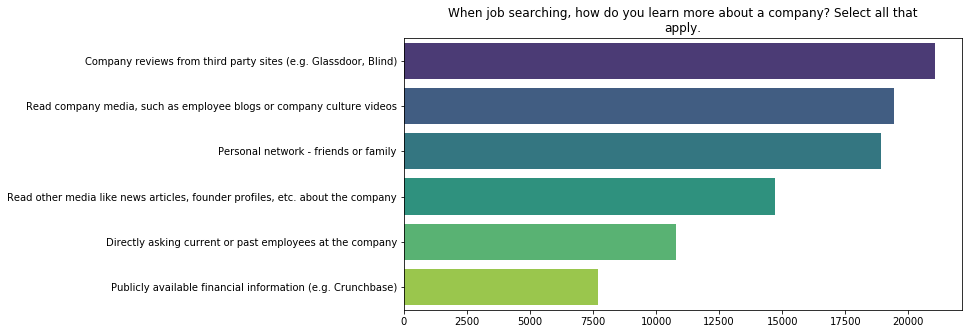

In [48]:
split_plot('NEWJobHuntResearch')

When looking for a new job, other people's opinion are important!    
* Developers mainly seek company reviews on third-party sites like Glassdoor, read company media, such as employee blogs or company culture videos, and ask friends or family.

---

In [49]:
#author: @priscillapreks
#date: apr/2021